# Exploratory Data Analysis - Assignment

## 🔍 Overview
This lab is designed to help you practice exploratory data analysis using Python. You will work with some housing data for the state of California. You will use various data visualization and analysis techniques to gain insights and identify patterns in the data, and clean and preprocess the data to make it more suitable for analysis. The lab is divided into the following sections:

- Data Loading and Preparation
- Data Visualization
- Data Cleaning and Preprocessing (using visualizations)

## 🎯 Objectives
This assignment assess your ability to:
- Load and pre-process data using `pandas`
- Clean data and preparing it for analysis
- Use visualization techniques to explore and understand the data
- Use visualization techniques to identify patterns and relationships in the data
- Use visualization to derive insights from the data
- Apply basic statistical analysis to derive insights from the data
- Communicate your findings through clear and effective data visualizations and summaries

#### Package Imports
We will keep coming back to this cell to add "import" statements, and configure libraries as we need

In [66]:
# Common imports
import numpy as np
import pandas as pd
from scipy.stats import trim_mean

# To plot figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix


# Configure pandas to display 500 rows; otherwise it will truncate the output
pd.set_option('display.max_rows', 500)
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.style.use("bmh")

## Housing Data in California

### Task 1:  Load the dataset
The dataset is available in the `data/housing.csv` file. Check the file to determine the delimiter and/or the appropriate pandas method to use to load the data.

Make sure you name the variable `housing` and that you use the appropriate pandas method to load the data.

In [67]:
# 💻 Import the dataset in the project (data/housing.csv) into a dataframe called (housing)
housing = pd.read_csv("data/housing.csv")



### Task 2: Confirm the data was loaded correctly

#### 2.1: Get the first 6 records of the dataset

In [68]:
# 💻 Get the first 6 records of the dataframe
housing.head(6)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY


#### 2.2: Get the last 7 records of the dataset

In [69]:
# 💻 Get the last 7 records of the dataframe
housing.tail(7)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20633,-121.53,39.19,27.0,2080.0,412.0,1082.0,382.0,2.5495,98300.0,INLAND
20634,-121.56,39.27,28.0,2332.0,395.0,1041.0,344.0,3.7125,116800.0,INLAND
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


#### 2.3: Get a random sample of 10 records

In [70]:
# 💻 Get a random 10 records of the dataframe
housing.sample(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
5318,-118.42,34.06,44.0,533.0,90.0,291.0,97.0,10.8045,500001.0,<1H OCEAN
18264,-122.08,37.38,25.0,830.0,228.0,368.0,174.0,3.3917,342900.0,NEAR BAY
10802,-117.96,33.60,34.0,959.0,230.0,384.0,197.0,5.2333,471400.0,NEAR OCEAN
3474,-118.49,34.28,31.0,3508.0,585.0,1957.0,588.0,6.6458,285500.0,<1H OCEAN
17742,-121.78,37.31,7.0,1973.0,328.0,1047.0,303.0,6.2340,292200.0,<1H OCEAN
14776,-117.08,32.58,22.0,2128.0,477.0,1420.0,450.0,3.2687,131000.0,NEAR OCEAN
8154,-118.11,33.82,37.0,1987.0,347.0,1095.0,357.0,4.3203,232800.0,<1H OCEAN
1158,-121.53,39.53,35.0,1806.0,293.0,683.0,295.0,4.5156,91200.0,INLAND
7906,-118.10,33.86,21.0,3052.0,624.0,1588.0,568.0,4.3397,268100.0,<1H OCEAN
9134,-118.07,34.51,14.0,2798.0,459.0,1236.0,404.0,4.8667,239900.0,INLAND


#### 2.4: Get information about the dataset, including the number of rows, number of columns, column names, and data types of each column

In [71]:
# 💻 Show information about the different data columns (columns, data types, ...etc.)
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


> 🚩 This is a good point to commit your code to your repository.

### Task 3: Understand the data types
For each of the 10 columns, Identify the data type: (Numerical-Continuous, Numerical-Discrete, Categorical-Ordinal, Categorical-nominal )

<details>
<summary>Click here for the data type diagram</summary>

  ![Data types](https://miro.medium.com/max/1400/1*kySPZcf83qLOuaqB1vJxlg.jpeg)
</details>

> 🚩 This is a good point to commit your code to your repository.

### Task 4: Understand the data
#### 4.1: Get the summary statistics for the numerical columns

In [72]:
# 💻 Show the descriptive statistics information about the columns in the data frame
housing.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


#### 4.2: For the categorical columns, get the frequency counts for each category

<details>
  <summary>🦉 Hints</summary>

  - Use the `value_counts()` method on the categorical columns
</details>

In [73]:
# 💻 Show the frequency of the values in the ocean_proximity column
housing["ocean_proximity"].value_counts()


ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

> 🚩 This is a good point to commit your code to your repository.

### Task 5: Visualize the data

#### 5.1: Visualize the distribution of the numerical columns
In a single figure, plot the histograms for all the numerical columns. Use a bin size of 50 for the histograms

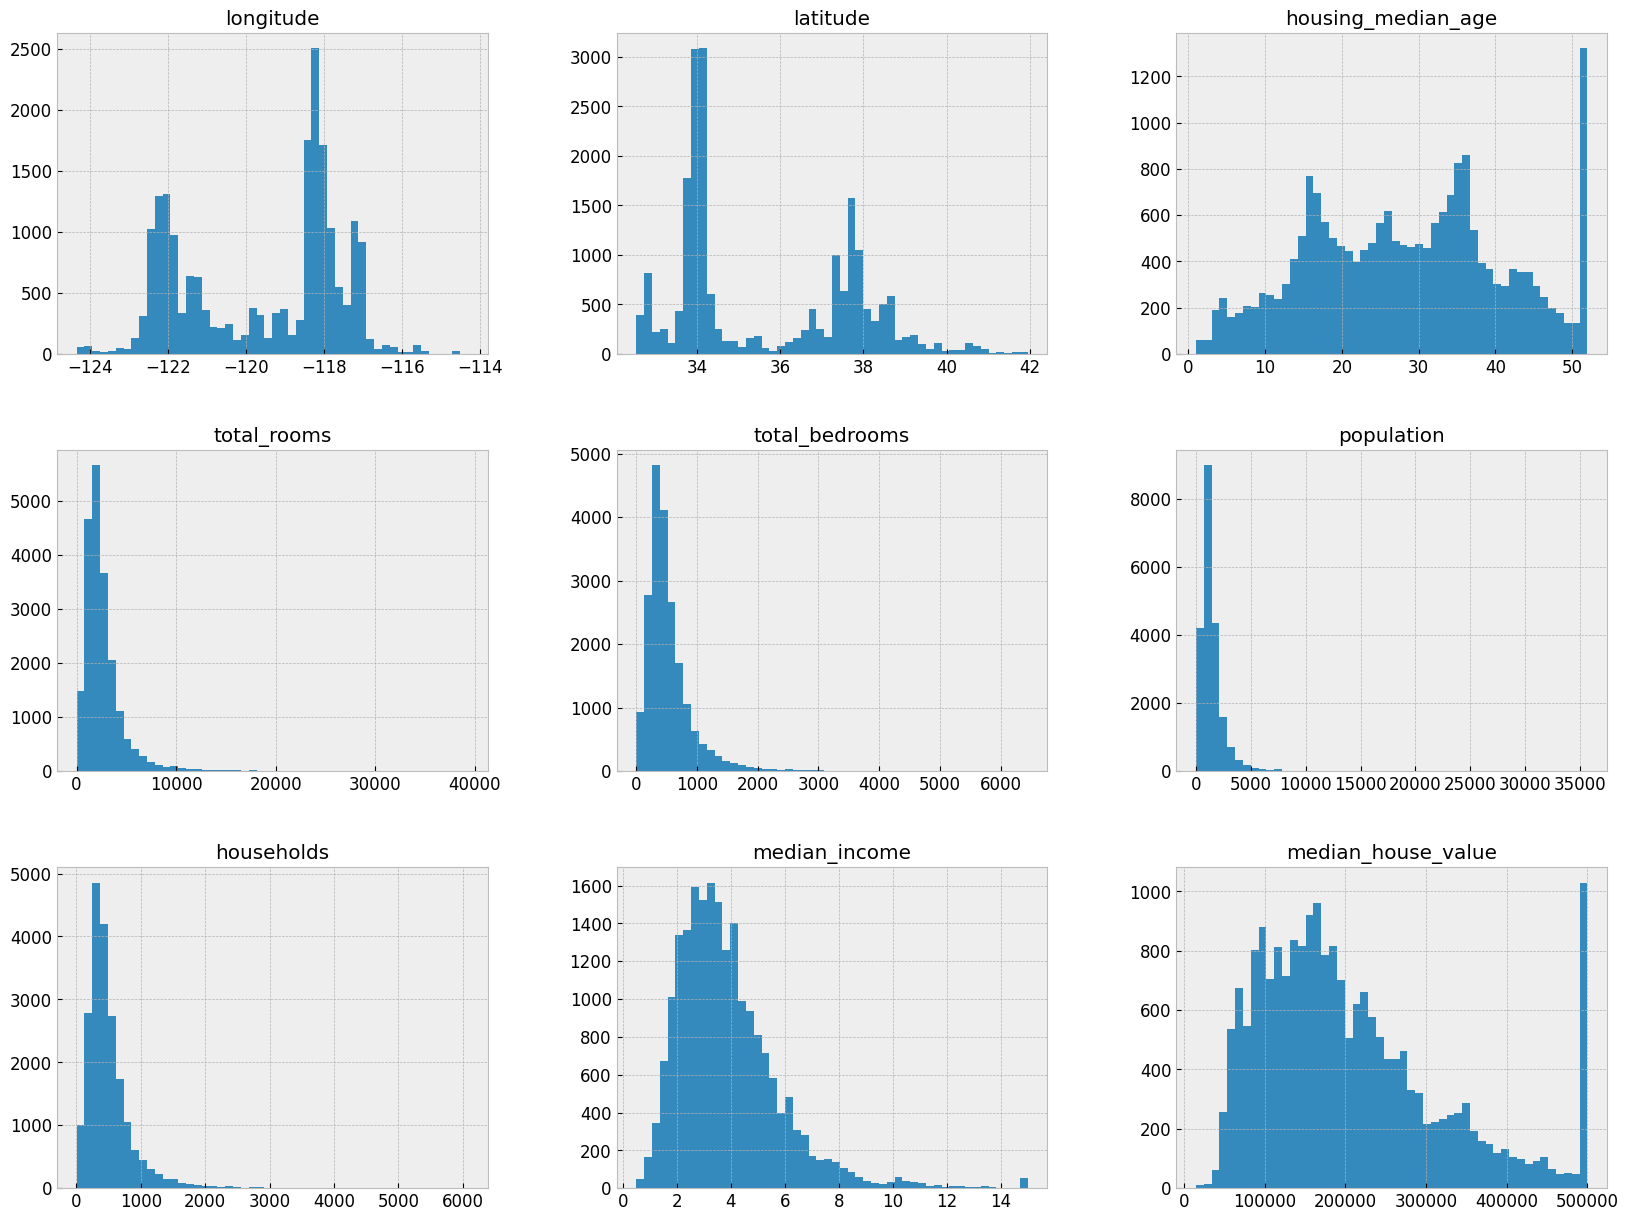

In [74]:
# 💻 Plot a histogram of all the data features( with a bin size of 50)
housing.hist(bins=50, figsize=(20, 15))
plt.show()


#### 5.2: Visualize the distribution of only one column
Plot the histogram for the `median_income` column. Use a bin size of 50 for the histogram

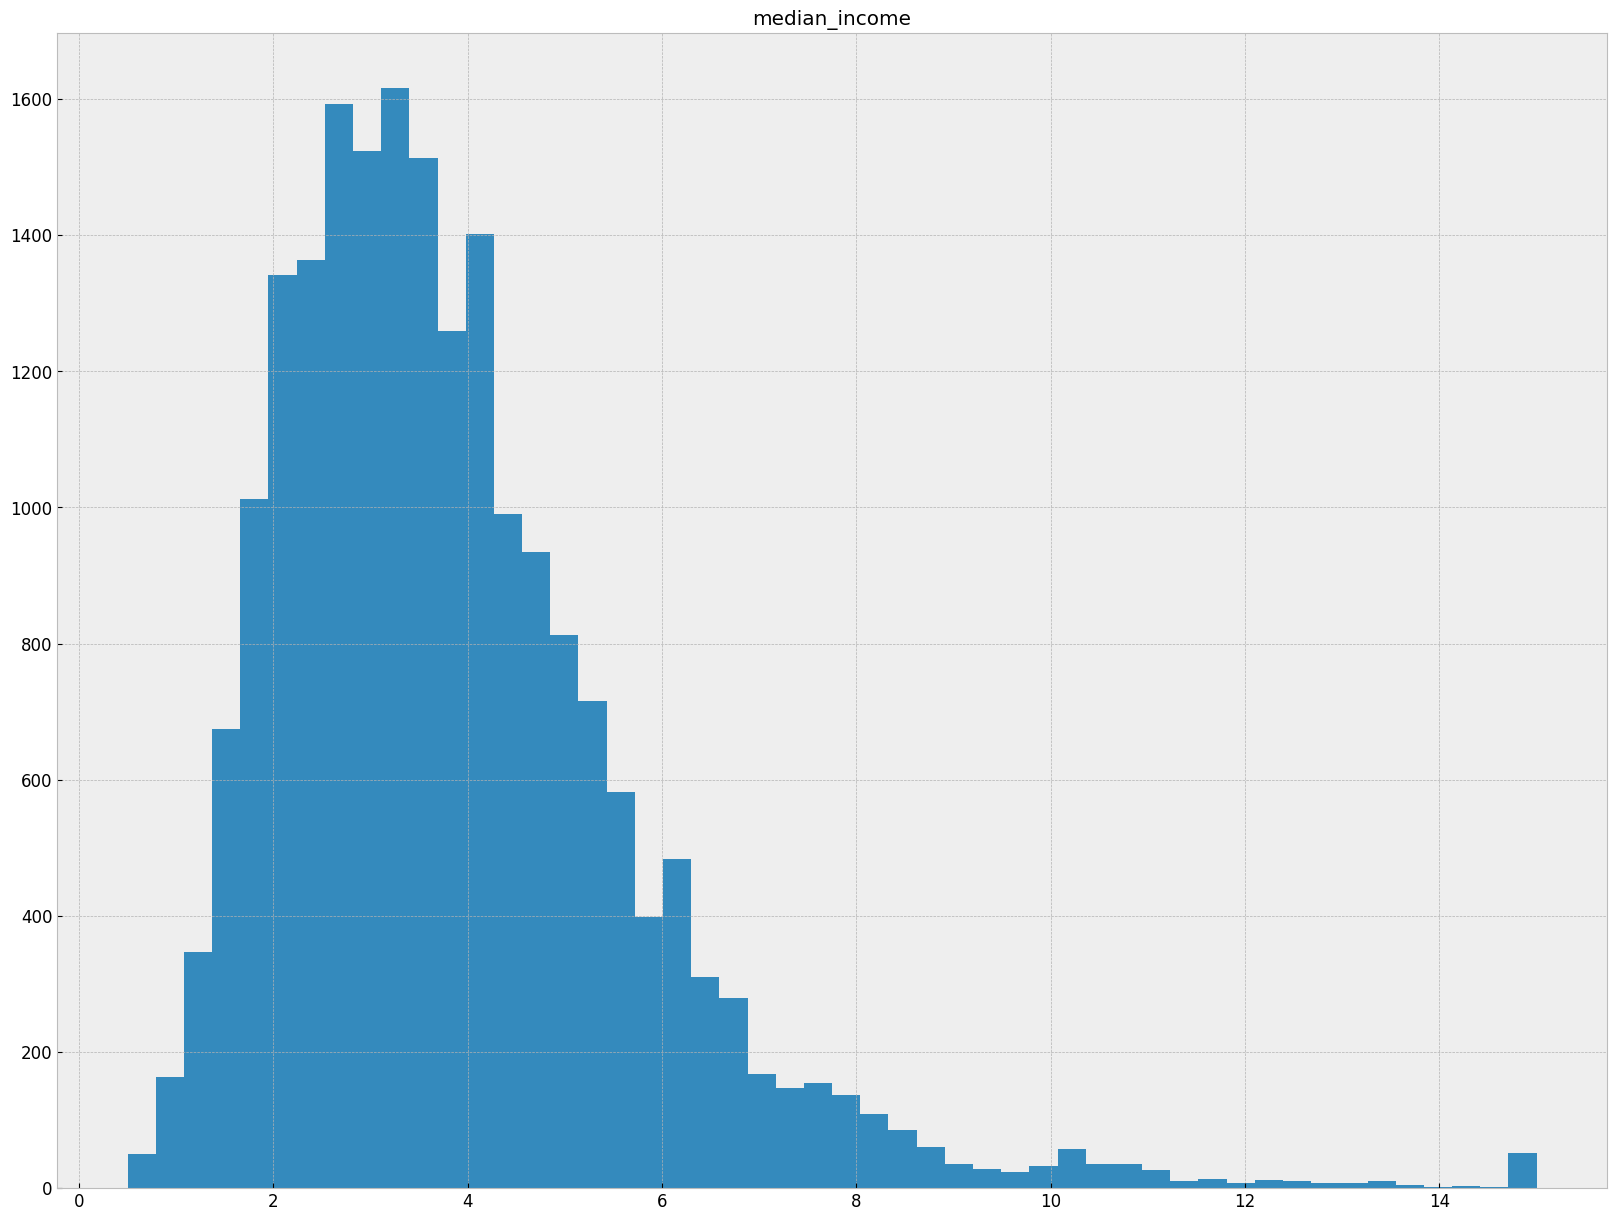

In [75]:
# 💻 plot a histogram of only the median_income
housing.hist(column="median_income", bins=50, figsize=(20, 15))
plt.show()  


> 🚩 This is a good point to commit your code to your repository.

#### 5.3: Visualize the location of the houses using a scatter plot
In a single figure, plot a scatter plot of the `longitude` and `latitude` columns. 


Try this twice, once setting the `alpha` parameter to set the transparency of the points to 0.1, and once without setting the `alpha` parameter.

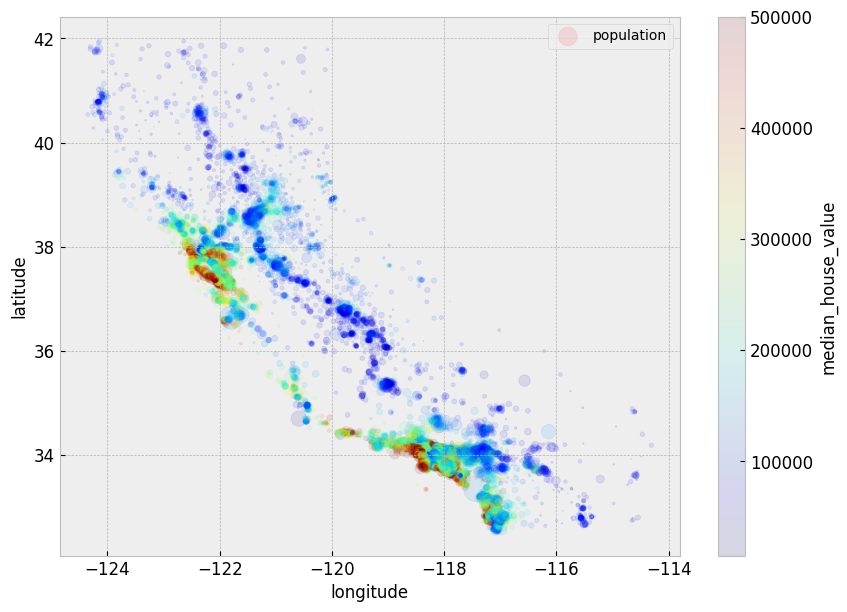

In [76]:
# 💻 scatter plat without alpha
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1,
             s=housing["population"]/100, label="population", figsize=(10, 7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()



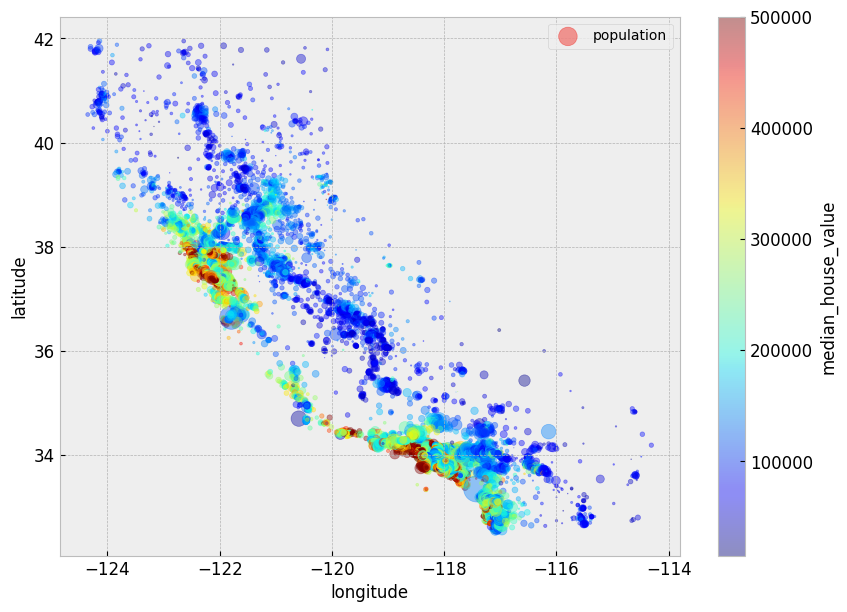

In [77]:
# 💻 scatter plat with alpha
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10, 7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()    


> 🚩 This is a good point to commit your code to your repository.

💯✨ For 3 Extra Credit points; Use the Plotly express to plot the scatter plot on a map of california

(📜 Check out the examples on their docs)[https://plotly.com/python/scatter-plots-on-maps/]

In [78]:
# 💻💯✨ Plot the data on a map of California
import matplotlib.pyplot as plt
import matplotlib.image as mpimg                
        

> 🚩 This is a good point to commit your code to your repository.

### Task 6: Explore the data and find correlations

#### 6.1: Generate a correlation matrix for the numerical columns

Non-numeric columns: Index(['ocean_proximity'], dtype='object')
median_house_value            1.000000
median_income                 0.688075
ocean_proximity_<1H OCEAN     0.256617
ocean_proximity_NEAR BAY      0.160284
ocean_proximity_NEAR OCEAN    0.141862
total_rooms                   0.134153
housing_median_age            0.105623
households                    0.065843
total_bedrooms                0.049686
ocean_proximity_ISLAND        0.023416
population                   -0.024650
longitude                    -0.045967
latitude                     -0.144160
ocean_proximity_INLAND       -0.484859
Name: median_house_value, dtype: float64


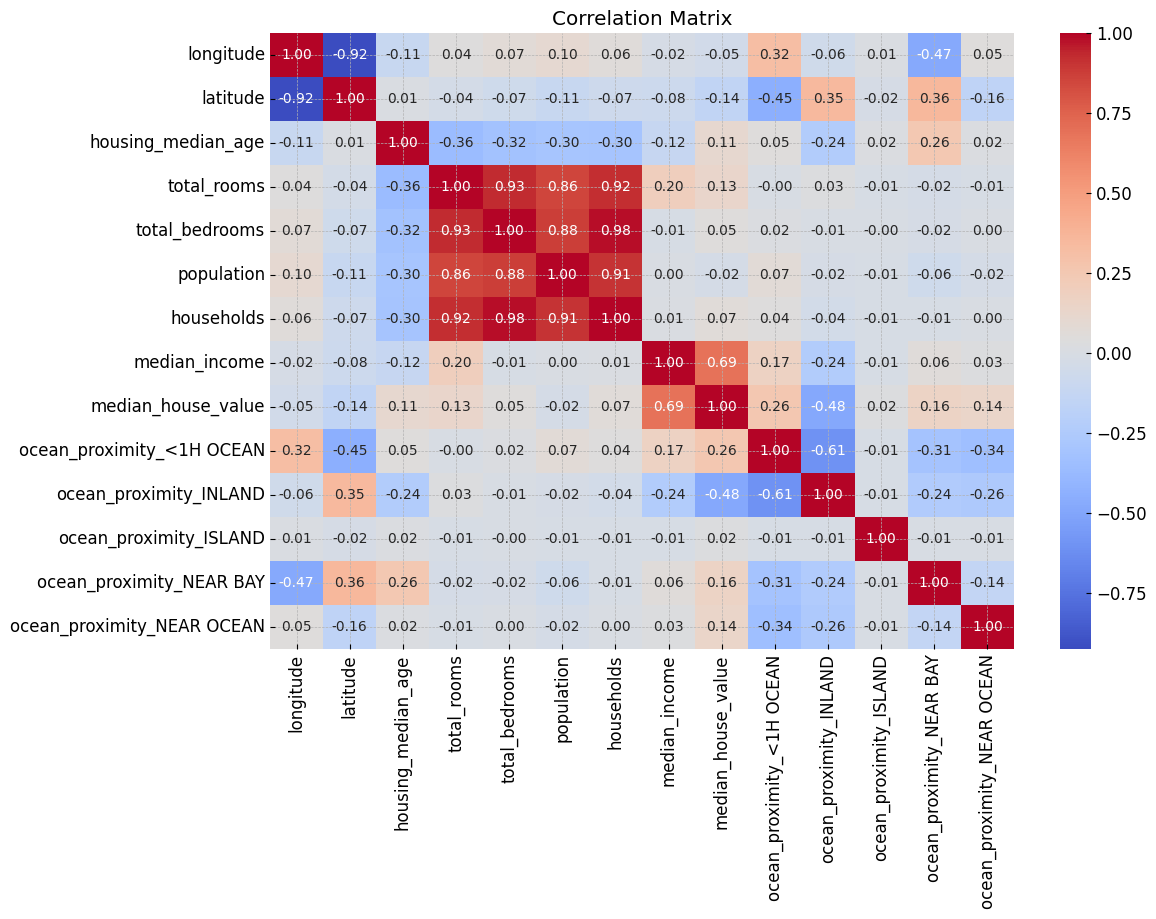

In [79]:
# Identify non-numeric columns
non_numeric_columns = housing.select_dtypes(include=['object']).columns
print(f"Non-numeric columns: {non_numeric_columns}")

# Encode non-numeric columns using one-hot encoding
housing_encoded = pd.get_dummies(housing, columns=non_numeric_columns)

# 💻 Get the correlation matrix of the housing data
corr_matrix = housing_encoded.corr()

# 💻 Get the correlation of the median_house_value with all other features
print(corr_matrix["median_house_value"].sort_values(ascending=False))

# 💻 Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()



#### 6.2: Get the Correlation data fro the `housing_median_age` column
sort the results in descending order

In [84]:
# 💻 Get the correlation data for just the median_house_age
median_house_age_corr = corr_matrix["housing_median_age"].sort_values(ascending=False)
print(median_house_age_corr)


housing_median_age            1.000000
ocean_proximity_NEAR BAY      0.255172
median_house_value            0.105623
ocean_proximity_<1H OCEAN     0.045300
ocean_proximity_NEAR OCEAN    0.021622
ocean_proximity_ISLAND        0.017020
latitude                      0.011173
longitude                    -0.108197
median_income                -0.119034
ocean_proximity_INLAND       -0.236645
population                   -0.296244
households                   -0.302916
total_bedrooms               -0.320451
total_rooms                  -0.361262
Name: housing_median_age, dtype: float64


#### 6.2: Visualize the correlation matrix using a heatmap
- use the coolwarm color map
- show the numbers on the heatmap


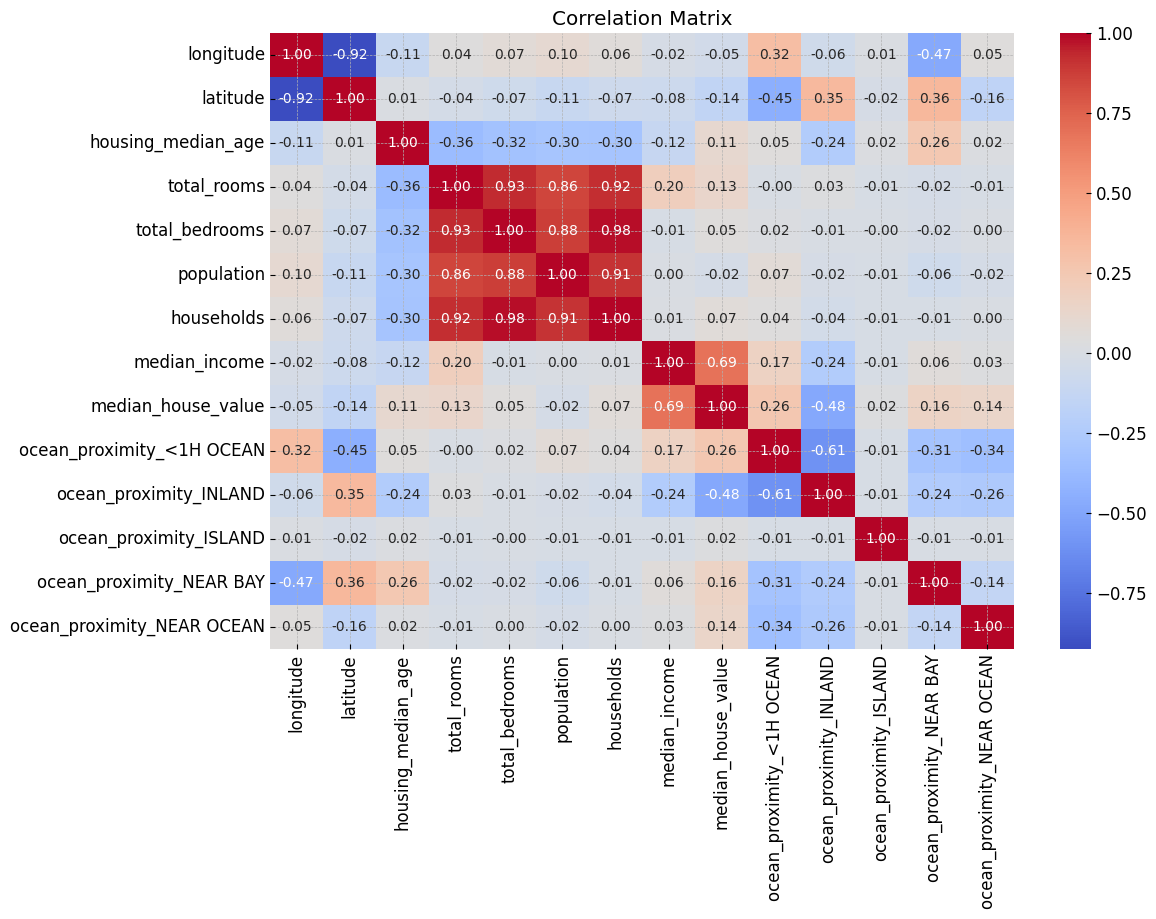

In [85]:
# 💻 Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()  

#### 6.3: Visualize the correlations between some of the features using a scatter matrix
- Plot a scatter matrix for the `total_rooms`, `median_house_age`, `median_income`, and `median_house_value` columns

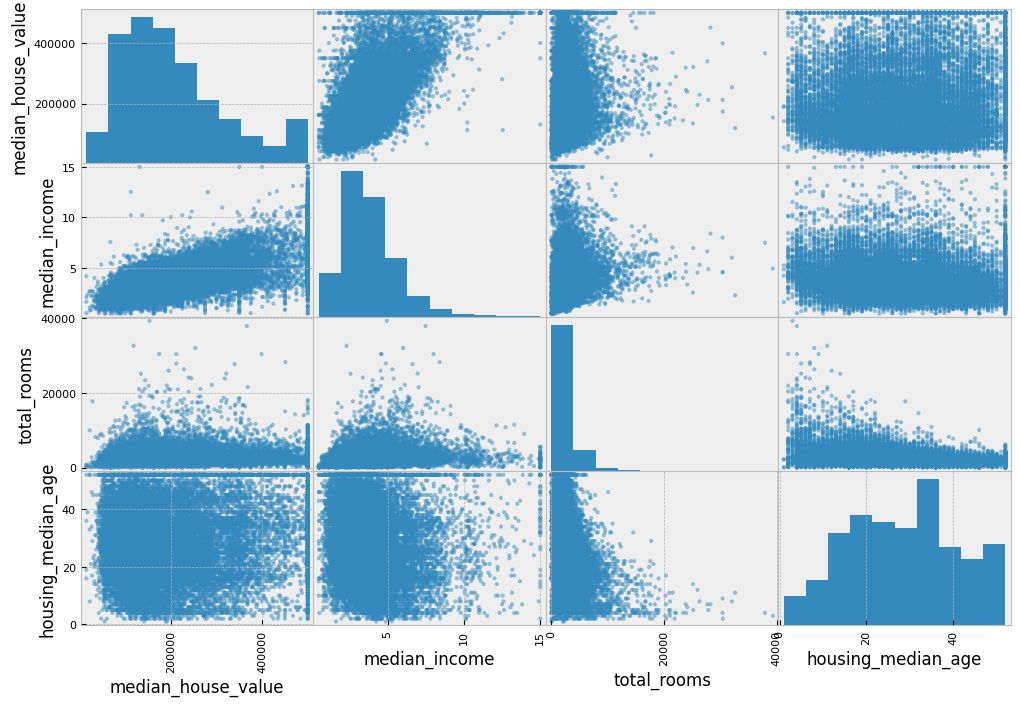

In [86]:
# 💻 using Pandas Scatter Matrix Plotting, Plot the scatter matrix for (median_house_value, median_income, total_rooms, housing_median_age)
scatter_matrix(housing[["median_house_value", "median_income", "total_rooms", "housing_median_age"]], figsize=(12, 8))
plt.show()  


#### 6.4: Visualize the correlations between 2 features using a scatter plot
- use an `alpha` value of 0.1

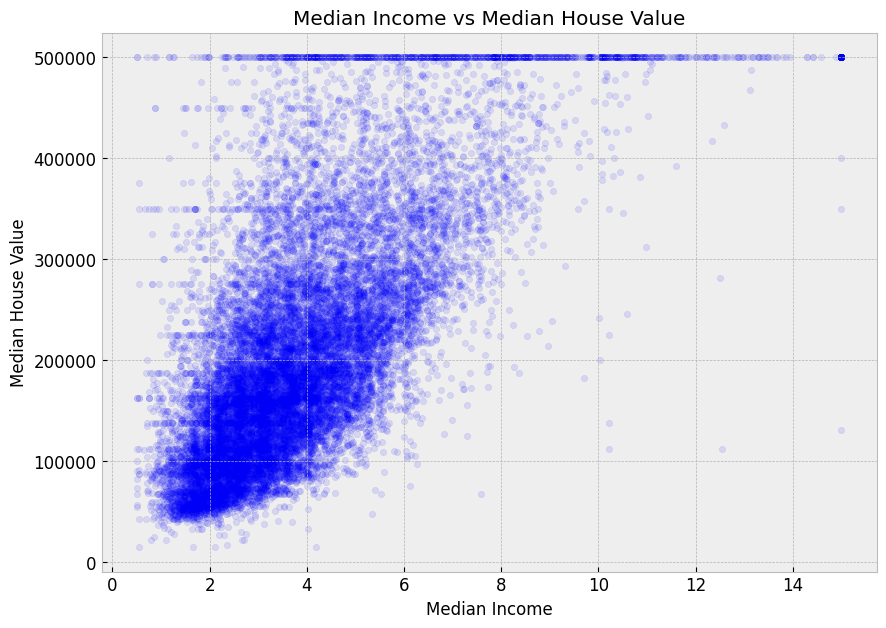

In [87]:
# 💻 Plot the scatter plot for just (median_income and median_house_value)
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1, figsize=(10, 7))
plt.title("Median Income vs Median House Value")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.show()


#### 6.5: ❓ What do you notice about the chart? what could that mean?
What could the lines of values at the top of the chart mean here?

> 🚩 This is a good point to commit your code to your repository.

### Task 7: Data Cleaning - Duplicate Data

#### 7.1: Find duplicate data

In [ ]:
# Identify the duplicate data in the dataset
duplicate_data = housing.duplicated()
print(f"Duplicate data:\n{duplicate_data}")

Duplicate data:
0        False
1        False
2        False
3        False
4        False
         ...  
20635    False
20636    False
20637    False
20638    False
20639    False
Length: 20640, dtype: bool


### Task 8: Data Cleaning - Missing Data

#### 8.1: Find missing data

In [ ]:
# Identify the missing data in the dataset
missing_data = housing.isnull()     
print(f"Missing data:\n{missing_data}")


Missing data:
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0          False     False               False        False           False   
1          False     False               False        False           False   
2          False     False               False        False           False   
3          False     False               False        False           False   
4          False     False               False        False           False   
...          ...       ...                 ...          ...             ...   
20635      False     False               False        False           False   
20636      False     False               False        False           False   
20637      False     False               False        False           False   
20638      False     False               False        False           False   
20639      False     False               False        False           False   

       population  households  median

#### 8.2: show a sample of 5 records of the rows with missing data
Notice there are 2 keywords here: `sample` and (rows with missing data)

<details>
  <summary>🦉 Hints:</summary>

  * You'll do pandas filtering here
  * You'll need to use the `isna()` or `isnull()` method on the 1 feature with missing data. to find the rows with missing data
  * you'll need to use the `sample()` method to get a sample of 5 records of the results
</details>

In [ ]:
# use Pandas Filtering to show all the records with missing `total_bedrooms` field
missing_total_bedrooms = housing[housing["total_bedrooms"].isnull()]
print(f"Records with missing total_bedrooms:\n{missing_total_bedrooms}")
        

Records with missing total_bedrooms:
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
290      -122.16     37.77                47.0       1256.0             NaN   
341      -122.17     37.75                38.0        992.0             NaN   
538      -122.28     37.78                29.0       5154.0             NaN   
563      -122.24     37.75                45.0        891.0             NaN   
696      -122.10     37.69                41.0        746.0             NaN   
738      -122.14     37.67                37.0       3342.0             NaN   
1097     -121.77     39.66                20.0       3759.0             NaN   
1350     -121.95     38.03                 5.0       5526.0             NaN   
1456     -121.98     37.96                22.0       2987.0             NaN   
1493     -122.01     37.94                23.0       3741.0             NaN   
1606     -122.08     37.88                26.0       2947.0             NaN   
2028     -119.7

#### 8.3: Calculate the central tendency values of the missing data feature
* Calculate the mean, median, trimmed mean

In [ ]:
# get the mean, median and trimmed mean of the total_bedrooms column
total_bedrooms_mean = housing["total_bedrooms"].mean()
total_bedrooms_median = housing["total_bedrooms"].median()
total_bedrooms_trimmed_mean = trim_mean(housing["total_bedrooms"].dropna(), proportiontocut=0.1)

# print the mean, median and trimmed mean of the total_bedrooms column

print(f"Median: {total_bedrooms_median}")
print(f"Mean: {total_berooms_mean}")
print(f"Trimmed Mean: {total_bedrooms_trimmed_mean}")

Median: 435.0
Mean: 0
Trimmed Mean: 471.43818437633814


#### 8.4: Visualize the distribution of the missing data feature
* Plot a histogram of the missing data feature (total_bedrooms)

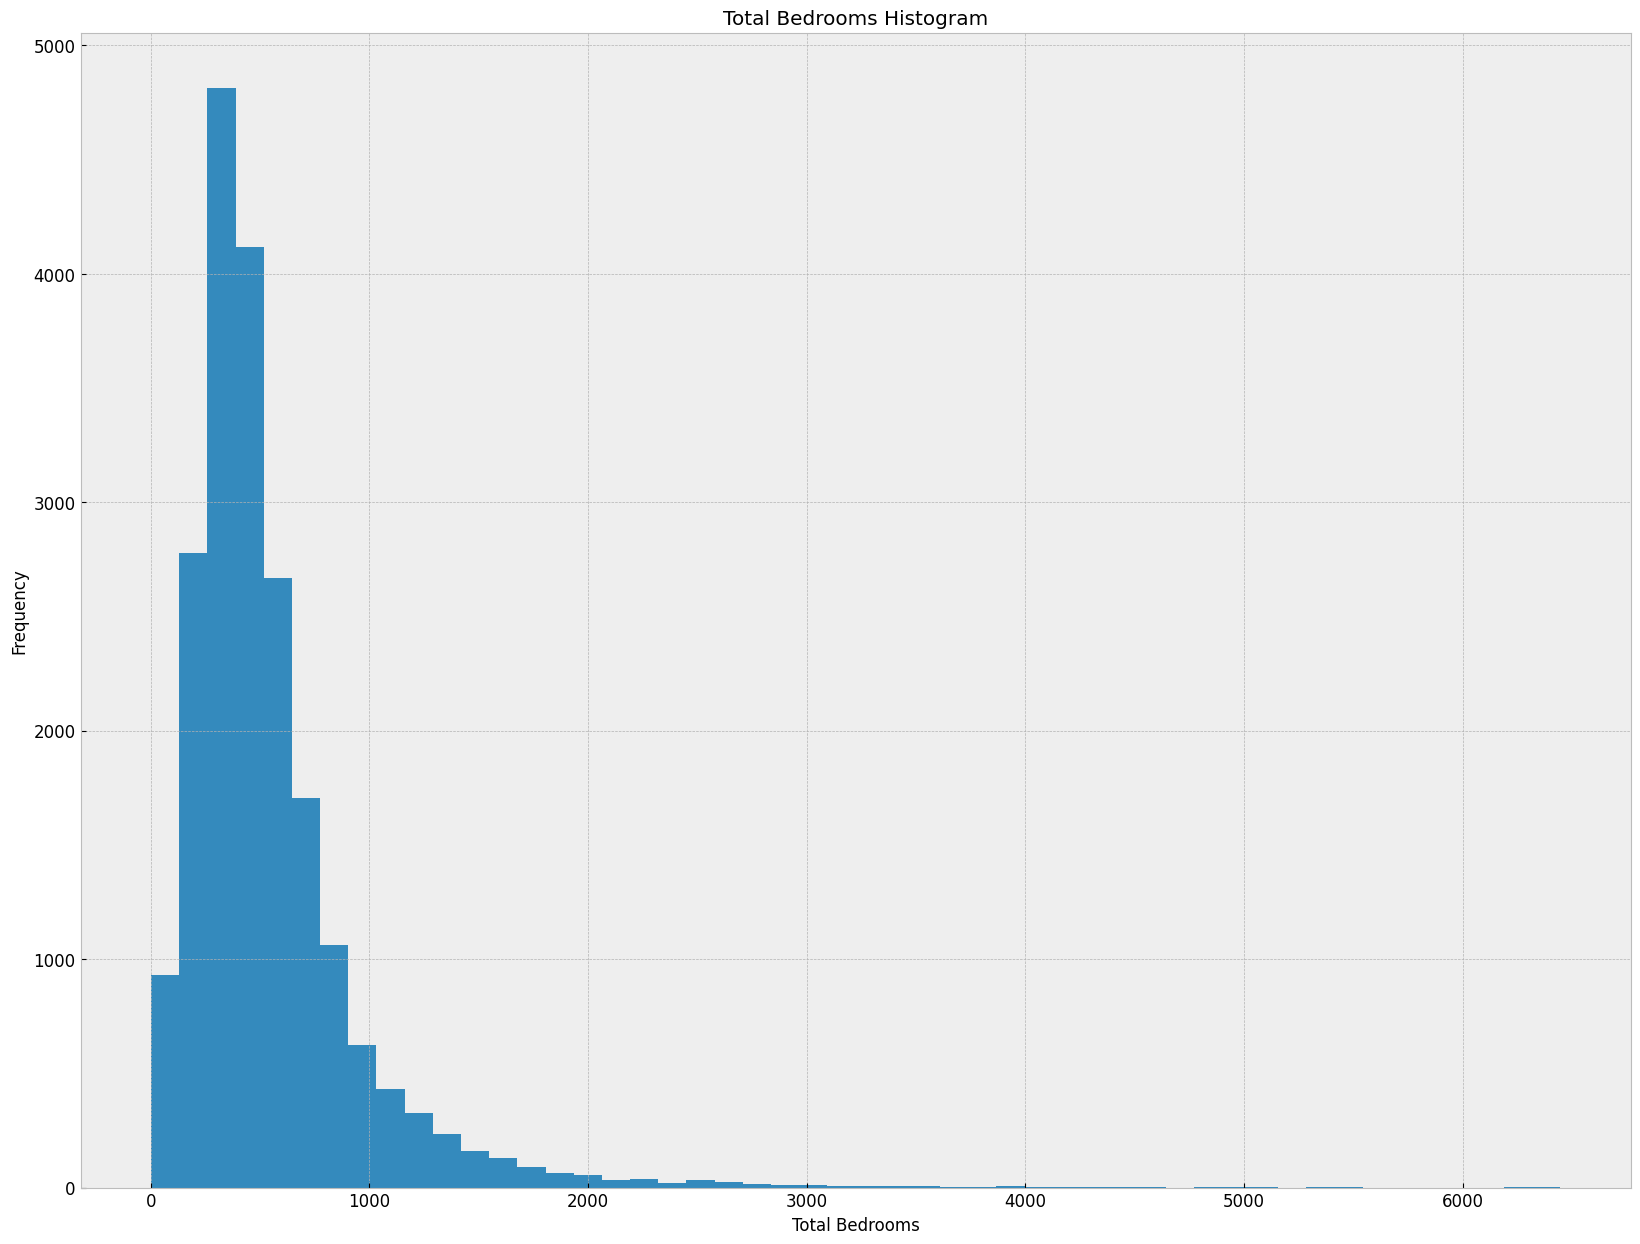

In [94]:
# Plot the histogram of the total_bedrooms column
housing["total_bedrooms"].hist(bins=50, figsize=(20, 15))
plt.title("Total Bedrooms Histogram")
plt.xlabel("Total Bedrooms")
plt.ylabel("Frequency")
plt.show()


#### 8.5: Choose one of the central tendency values and use it to fill in the missing data
* Justify your choice
* Don't use the `inplace` parameter, instead, create a new dataframe with the updated values. (this is a bit challenging)
* show the first 5 records of the new dataframe to confirm we got the full dataframe

[📜 You should find a good example here](https://www.sharpsightlabs.com/blog/pandas-fillna/#example-2)

In [104]:
# 💻 Fill the missing values in the total_bedrooms column with an appropriate value, then show the first 5 records of the new dataframe
# Load the dataset
housing = pd.read_csv('data/housing.csv')

# Calculate the median of the 'total_bedrooms' column
total_bedrooms_median = housing['total_bedrooms'].median()

# Create a new DataFrame with missing values filled using the median
new_housing = housing.copy()
new_housing['total_bedrooms'] = new_housing['total_bedrooms'].fillna(total_bedrooms_median)

# Show the first 5 records of the new DataFrame
print(new_housing.head(5))



   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


❓ Why did you choose this value?

#### 8.6: Confirm that there are no more missing values in the new dataframe
* make sure the dataframe contains all features, not just the `total_bedrooms` feature

In [105]:
# 💻 Confirm the new dataframe has no missing values
missing_values = new_housing.isnull().sum()
print(f"Missing values in the new DataFrame:\n{missing_values}")


Missing values in the new DataFrame:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


#### 8.7: Dropping the missing data
assume we didn't want to impute the missing data, and instead, we wanted to drop the rows with missing data.
* don't use the `inplace` parameter, instead, create a new dataframe with the updated values.

In [106]:
# 💻 drop the missing rows of the total_bedroom and save it to a new dataframe
new_housing = housing.dropna(subset=["total_bedrooms"])
print(new_housing.head(5))


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


#### 8.8: Confirm that there are no more missing values in the new dataframe
* make sure the dataframe contains all features, not just the `total_bedrooms` feature

In [108]:
# 💻 Confirm the new dataframe has no missing values
missing_values = new_housing.isnull().sum()
print(f"Missing values in the new DataFrame:\n{missing_values}")



Missing values in the new DataFrame:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


> 🚩 This is a good point to commit your code to your repository.

## Wrap up
Remember to update the self reflection and self evaluations on the `README` file.

Make sure you run the following cell; this converts this Jupyter notebook to a Python script. and will make the process of reviewing your code on GitHub easier

In [ ]:
# 🦉: The following command converts this Jupyter notebook to a Python script.
!jupyter nbconvert --to python notebook.ipynb

[NbConvertApp] Converting notebook notebook.ipynb to python
[NbConvertApp] Writing 10643 bytes to notebook.py


> 🚩 **Make sure** you save the notebook and make one final commit here